# Análisis de sentimientos de tweets para recomendar péliculas de IMDB

## Código de ejemplo (https://www.geeksforgeeks.org/python-api-user_timeline-in-tweepy/)

    

In [4]:
"""A script for testing that TensorFlow is installed correctly on Windows.

The script will attempt to verify your TensorFlow installation, and print
suggestions for how to fix your installation.
"""

import ctypes
import imp
import sys

def main():
  try:
    import tensorflow as tf
    print("TensorFlow successfully installed.")
    if tf.test.is_built_with_cuda():
      print("The installed version of TensorFlow includes GPU support.")
    else:
      print("The installed version of TensorFlow does not include GPU support.")
  except ImportError:
    print("ERROR: Failed to import the TensorFlow module.")

  candidate_explanation = False

  python_version = sys.version_info.major, sys.version_info.minor
  print("\n- Python version is %d.%d." % python_version)
  if not (python_version == (3, 5) or python_version == (3, 6)):
    candidate_explanation = True
    print("- The official distribution of TensorFlow for Windows requires "
          "Python version 3.5 or 3.6.")
  
  try:
    _, pathname, _ = imp.find_module("tensorflow")
    print("\n- TensorFlow is installed at: %s" % pathname)
  except ImportError:
    candidate_explanation = False
    print("""
- No module named TensorFlow is installed in this Python environment. You may
  install it using the command `pip install tensorflow`.""")

  try:
    msvcp140 = ctypes.WinDLL("msvcp140.dll")
  except OSError:
    candidate_explanation = True
    print("""
- Could not load 'msvcp140.dll'. TensorFlow requires that this DLL be
  installed in a directory that is named in your %PATH% environment
  variable. You may install this DLL by downloading Microsoft Visual
  C++ 2015 Redistributable Update 3 from this URL:
  https://www.microsoft.com/en-us/download/details.aspx?id=53587""")

  try:
    cudart64_80 = ctypes.WinDLL("cudart64_80.dll")
  except OSError:
    candidate_explanation = True
    print("""
- Could not load 'cudart64_80.dll'. The GPU version of TensorFlow
  requires that this DLL be installed in a directory that is named in
  your %PATH% environment variable. Download and install CUDA 8.0 from
  this URL: https://developer.nvidia.com/cuda-toolkit""")

  try:
    nvcuda = ctypes.WinDLL("nvcuda.dll")
  except OSError:
    candidate_explanation = True
    print("""
- Could not load 'nvcuda.dll'. The GPU version of TensorFlow requires that
  this DLL be installed in a directory that is named in your %PATH%
  environment variable. Typically it is installed in 'C:\Windows\System32'.
  If it is not present, ensure that you have a CUDA-capable GPU with the
  correct driver installed.""")

  cudnn5_found = False
  try:
    cudnn5 = ctypes.WinDLL("cudnn64_5.dll")
    cudnn5_found = True
  except OSError:
    candidate_explanation = True
    print("""
- Could not load 'cudnn64_5.dll'. The GPU version of TensorFlow
  requires that this DLL be installed in a directory that is named in
  your %PATH% environment variable. Note that installing cuDNN is a
  separate step from installing CUDA, and it is often found in a
  different directory from the CUDA DLLs. You may install the
  necessary DLL by downloading cuDNN 5.1 from this URL:
  https://developer.nvidia.com/cudnn""")

  cudnn6_found = False
  try:
    cudnn = ctypes.WinDLL("cudnn64_6.dll")
    cudnn6_found = True
  except OSError:
    candidate_explanation = True

  if not cudnn5_found or not cudnn6_found:
    print()
    if not cudnn5_found and not cudnn6_found:
      print("- Could not find cuDNN.")
    elif not cudnn5_found:
      print("- Could not find cuDNN 5.1.")
    else:
      print("- Could not find cuDNN 6.")
      print("""
  The GPU version of TensorFlow requires that the correct cuDNN DLL be installed
  in a directory that is named in your %PATH% environment variable. Note that
  installing cuDNN is a separate step from installing CUDA, and it is often
  found in a different directory from the CUDA DLLs. The correct version of
  cuDNN depends on your version of TensorFlow:
  
  * TensorFlow 1.2.1 or earlier requires cuDNN 5.1. ('cudnn64_5.dll')
  * TensorFlow 1.3 or later requires cuDNN 6. ('cudnn64_6.dll')
    
  You may install the necessary DLL by downloading cuDNN from this URL:
  https://developer.nvidia.com/cudnn""")
    
  if not candidate_explanation:
    print("""
- All required DLLs appear to be present. Please open an issue on the
  TensorFlow GitHub page: https://github.com/tensorflow/tensorflow/issues""")


main()

TensorFlow successfully installed.
The installed version of TensorFlow includes GPU support.

- Python version is 3.8.
- The official distribution of TensorFlow for Windows requires Python version 3.5 or 3.6.

- TensorFlow is installed at: C:\Users\Victo\anaconda3\lib\site-packages\tensorflow

- Could not load 'cudart64_80.dll'. The GPU version of TensorFlow
  requires that this DLL be installed in a directory that is named in
  your %PATH% environment variable. Download and install CUDA 8.0 from
  this URL: https://developer.nvidia.com/cuda-toolkit

- Could not load 'cudnn64_5.dll'. The GPU version of TensorFlow
  requires that this DLL be installed in a directory that is named in
  your %PATH% environment variable. Note that installing cuDNN is a
  separate step from installing CUDA, and it is often found in a
  different directory from the CUDA DLLs. You may install the
  necessary DLL by downloading cuDNN 5.1 from this URL:
  https://developer.nvidia.com/cudnn

- Could not find cuD

In [25]:
import tensorflow as tf
from tensorflow.python.client import device_lib


tf.version.VERSION




'2.4.1'

In [3]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
from english_words import english_words_set

def twitterClient():

    # keys and tokens from the Twitter Dev Console
    consumer_key = 'QfHzmKICwbmttyZy7zdejcqKl'
    consumer_secret = 'aOrUpMfze7ijUSI8DQzHtkHodoVcUgLV2YMx2BSok4sKoKYHGA'
    access_token = '625111410-5oZNSPcdo0p1dfbuovFyUq6UCOKe28e2Luh8qSXf'
    access_token_secret = 'RgXvLhn52v3YAyXhvVHI6AlHqEeu2kuxaXy320Mw99TnP'

    # attempt authentication
    try:
        # create OAuthHandler object
        auth = OAuthHandler(consumer_key, consumer_secret)
        # set access token and secret
        auth.set_access_token(access_token, access_token_secret)
        # create tweepy API object to fetch tweets
        api = tweepy.API(auth)
    except:
        print("Error: Authentication Failed")
        
    return api

def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()).lower()
        tokens = []
        for x in tweet.split():
            if x in english_words_set: 
                tokens.append(x)
            
        return " ".join(tokens)
            

def get_tweet_sentiment(tweet):
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
    
def get_tweets(api, query, count = 10):
    tweets = []

    try:
        # call twitter api to fetch tweets
        fetched_tweets = api.search(q = query, count = count, include_rts=True)
        for tweet in fetched_tweets:
            # empty dictionary to store required params of a tweet
            parsed_tweet = {}
            # saving text of tweet
            parsed_tweet['text'] = tweet.text
            # saving sentiment of tweet
            parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.text)

            # appending parsed tweet to tweets list
            if tweet.retweet_count > 0:
                # if tweet has retweets, ensure that it is appended only once
                if parsed_tweet not in tweets:
                    tweets.append(parsed_tweet)
            else:
                tweets.append(parsed_tweet)
            # return parsed tweets
            return tweets
    except tweepy.TweepError as e:
        # print error (if any)
        print("Error : " + str(e))

def main():
    # creating object of TwitterClient Class
    api = twitterClient()
    # calling function to get tweets
    tweets = get_tweets(api, query = 'Donald Trump', count = 200)
    
    print(tweets)
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} % \
        ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'])

    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
                print(tweet['text'])

In [4]:
main()

[{'text': 'Do you have that certain friend who hated Donald Trump and all they could talk about was defeating Donald Trump? An… https://t.co/Up1G17iftP', 'sentiment': 'positive'}]
Positive tweets percentage: 100.0 %
Negative tweets percentage: 0.0 %
Neutral tweets percentage: 0.0 %         


Positive tweets:
Do you have that certain friend who hated Donald Trump and all they could talk about was defeating Donald Trump? An… https://t.co/Up1G17iftP


Negative tweets:


### Como podemos observar en este primer ejemplo clasificar el sentimiento de un tweet es una tarea bastante compleja y este caso lo hace de manera incorrecta ya que no es capaz de captar la negatividad del primer tweet.

In [55]:
import pandas as pd
#pandas
import numpy as np
#numpy
import matplotlib.pyplot as plt
#matplotlib
import seaborn as sns
#seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#sklearn
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam
#keras
import tensorflow as tf
#tensorflow
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#nltk
import re
import os
#other useful stuff
from wordcloud import WordCloud, STOPWORDS
#wordclouds and cloud stopwords
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = 'latin', header=None)

In [57]:
data

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [58]:
data = data.rename(columns={0: 'target', 1: 'id', 2: 'date', 3: 'query', 4: 'username', 5: 'content'})
data.head(1)

,target,id,date,query,username,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."


In [59]:
missing_data = data.isna().sum().sort_values(ascending=False)
percentage_missing = round((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100,2)
missing_info = pd.concat([missing_data,percentage_missing],keys=['Missing values','Percentage'],axis=1)
missing_info.style.background_gradient()

,Missing values,Percentage
content,0,0.000000
username,0,0.000000
query,0,0.000000
date,0,0.000000
id,0,0.000000
target,0,0.000000


In [60]:
data['target'] = data['target'].replace([0, 4],['Negative','Positive'])
data['target'].value_counts()

Positive    800000
Negative    800000
Name: target, dtype: int64

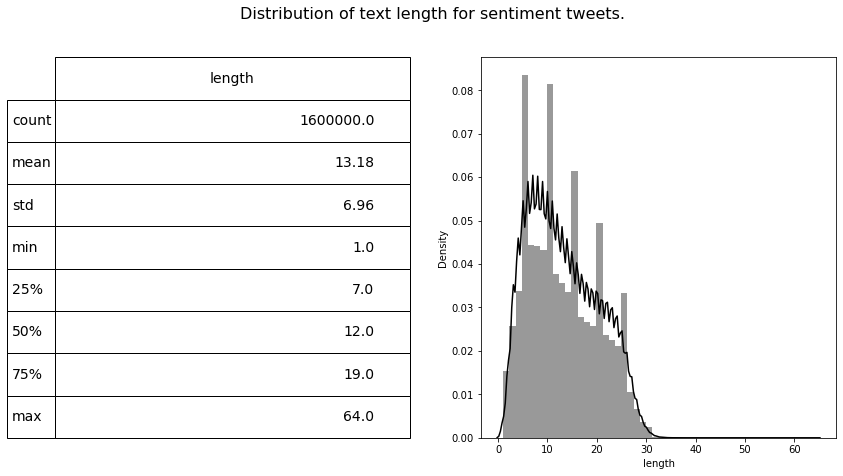

In [62]:
data['length'] = data.content.str.split().apply(len)

fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(data['length'], ax=ax1,color='black')
describe = data.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for sentiment tweets.', fontsize=16)

plt.show()

In [63]:
data.drop(['id','date','query','username','length'], axis=1, inplace=True)
data.target = data.target.replace({'Positive': 1, 'Negative': 0})
data.head()

,target,content
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [64]:
data.content = data.content.apply(lambda x: clean_tweet(x))
data.head()

,target,content
0,0,that s a you got of third day to do it d
1,0,is upset that he can t update his by it and mi...
2,0,i many for the ball to save the rest go out of
3,0,my whole body itchy and like on fire
4,0,no it s not at all i m mad why am i here becau...


In [65]:
train, test = train_test_split(data, test_size=0.1, random_state=44)
print('Train dataset shape: {}'.format(train.shape))
print('Test dataset shape: {}'.format(test.shape))

Train dataset shape: (1440000, 2)
Test dataset shape: (160000, 2)


In [66]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train.content)  
vocab_size = len(tokenizer.word_index) + 1 
max_length = 50
#Based on the analysis of the tweet length it was concluded that the maximum length for tokenization equal to 50 will be sufficient

sequences_train = tokenizer.texts_to_sequences(train.content) 
sequences_test = tokenizer.texts_to_sequences(test.content) 

X_train = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_test = pad_sequences(sequences_test, maxlen=max_length, padding='post')

y_train = train.target.values
y_test = test.target.values

In [67]:
X_train

array([[ 22,  12,  85, ...,   0,   0,   0],
       [  9,  18, 570, ...,   0,   0,   0],
       [  5,  51, 362, ...,   0,   0,   0],
       ...,
       [781,  32,   1, ...,   0,   0,   0],
       [  1, 106,   7, ...,   0,   0,   0],
       [  7,   1,  38, ...,   0,   0,   0]])

In [68]:
y_train

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [72]:
embeddings_dictionary = dict()
embedding_dim = 100
glove_file = open('glove.6B.100d.txt', encoding='utf-8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
    
glove_file.close()

embeddings_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embeddings_matrix[index] = embedding_vector

In [73]:
embedding_layer = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False)
num_epochs = 10
batch_size = 1000

In [74]:
model = Sequential([
        embedding_layer,
        tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Bidirectional(LSTM(128)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           1404800   
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 256)           234496    
_________________________________________________________________
dropout (Dropout)            (None, 50, 256)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [82]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size = batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10


KeyboardInterrupt: 

# Análisis de sentimientos

Mediante el dataset proporcionado por la web (https://www.kaggle.com/kazanova/sentiment140) y los recursos de TensorFlow lograremos clasificar nuevos tweets.
Cargamos primero el dataset:

In [19]:
#Importe de dependencias

import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


In [20]:
# Cargamos el dataset
# 0 Mensaje negativo
# 2 Mensaje neutral (No aparecen en el dataset)
# 4 Mensaje positivo

df = pd.read_csv('training.1600000.processed.noemoticon.csv', names=['target', 'ID', 'fecha', 'NO_QUERY', 'usuario', 'comentario'], encoding = "ISO-8859-1", engine='python')
#df = pd.read_csv('training.1600000.processed.noemoticon.csv', names=['target', 'ID', 'fecha', 'NO_QUERY', 'usuario', 'comentario'], encoding = "utf-8", engine='python')
df = df.drop(['NO_QUERY', 'fecha', 'ID', 'usuario'], axis=1) # Eliminamos las columnas no usadas para el análisis
#df = df.groupby('target').tail(10000)
df

,target,comentario
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [21]:
# Limpiamos el dataset (Estandarizado)
# Eliminar signos de puntuacion, poner el texto en minuscula y quedar con palabras que sean del diccionario ingles

df['comentario'] = df['comentario'].apply(lambda x: clean_tweet(x))
df

,target,comentario
0,0,that s a you got of third day to do it d
1,0,is upset that he can t update his by it and mi...
2,0,i many for the ball to save the rest go out of
3,0,my whole body itchy and like on fire
4,0,no it s not at all i m mad why am i here becau...
...,...,...
1599995,4,just woke up no school is the best
1599996,4,very cool to hear old
1599997,4,are you ready for your ask me for
1599998,4,happy birthday to my boo of time


In [17]:
dataset = tf.data.Dataset.from_tensor_slices((df['comentario'].values, df['target'].values))
# Mezclamos el data set
dataset = dataset.shuffle(len(df)).batch(1)

# En este caso tenemos una gran cantidad de tweets 1600000 por lo que no es necesario utilizar una parte del dataset
# para la validación

dataset_train = dataset.take(int(0.8 * len(df.values)))
dataset_test = dataset.skip(int(0.8 * len(df.values)))

In [18]:
# Preparamos el dataset
# Vectorizado y tokenizacion de los datos 

#max_features = 300000 # Tamaño maximo del vocabulario
sequence_length = 50 # Tamaño maximo de un tweet en palabras

vectorize_layer = TextVectorization(
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (without labels), then call adapt
train_text = dataset_train.map(lambda x, y: x)
for text_batch in train_text.take(2):
    print("Review", text_batch.numpy())

    # Guardado de datos en cache para facilitar el aprendizaje del modelo

vectorize_layer.adapt(train_text)

Review [b'i forget you again']
Review [b'beautiful like it a lot']


KeyboardInterrupt: 

In [177]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

text_batch, label_batch = next(iter(dataset_train))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Vectorized review",  vectorize_text(first_review, first_label))

Review tf.Tensor(b'my he t look like he good today', shape=(), dtype=string)
Vectorized review (<tf.Tensor: shape=(1, 50), dtype=int64, numpy=
array([[  6,  82,  14, 180,  43,  82,  28,  34,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [178]:
print("254 ---> ",vectorize_layer.get_vocabulary()[254])
print("1613 ---> ",vectorize_layer.get_vocabulary()[1613])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

254 --->  hair
1613 --->  cheesecake
Vocabulary size: 4650


In [164]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'i',
 'to',
 'the',
 'a',
 'my',
 'you',
 'and',
 'it',
 'is',
 'for',
 'in',
 's',
 'of',
 't',
 'that',
 'me',
 'on',
 'so',
 'have',
 'm',
 'just',
 'but',
 'with',
 'be',
 'not',
 'at',
 'was',
 'this',
 'can',
 'now',
 'good',
 'get',
 'day',
 'up',
 'are',
 'out',
 'all',
 'like',
 'no',
 'go',
 'today',
 'work',
 'do',
 'too',
 'love',
 'your',
 'we',
 'got',
 'what',
 'u',
 'time',
 'one',
 'from',
 'about',
 'know',
 'back',
 'will',
 'am',
 'amp',
 'don',
 'they',
 'new',
 'had',
 'how',
 'see',
 'if',
 'some',
 'there',
 'still',
 'think',
 'want',
 'when',
 'well',
 'miss',
 'he',
 'more',
 'night',
 'oh',
 'home',
 'as',
 'sad',
 'much',
 'or',
 'here',
 'off',
 're',
 'an',
 'need',
 'been',
 'last',
 'tomorrow',
 'has',
 'hope',
 'then',
 'feel',
 'she',
 'her',
 'great',
 'right',
 'again',
 'bad',
 'why',
 'sleep',
 'only',
 'very',
 'sorry',
 'wish',
 'them',
 'would',
 'make',
 'did',
 'come',
 'by',
 'happy',
 'fun',
 'way',
 'wait',
 'yeah',
 'shoul

In [179]:
# Vectorizado de todas las partes

train_ds = dataset_train.map(vectorize_text)
test_ds = dataset_test.map(vectorize_text)

In [180]:
# Guardado de datos en cache para facilitar el aprendizaje del modelo

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [181]:
# Creación de la red neuronal
embedding_dim = 16

model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 16)          4800016   
_________________________________________________________________
dropout_28 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_9 ( (None, 16)                0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 4,800,033
Trainable params: 4,800,033
Non-trainable params: 0
_________________________________________________________________


In [182]:
epochs = 10
history = model.fit(
    train_ds,
    #validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
 4519/16000 [=======>......................] - ETA: 5:00 - loss: -36.2790 - binary_accuracy: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
#embedding_layer = tf.keras.layers.Embedding(len(vectorize_layer.get_vocabulary()), embedding_dim, input_length=50, weights=[embeddings_matrix], trainable=False)

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(270242, 100),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

model.summary()

model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(train_ds, batch_size = 1000, epochs=10, validation_data=test_ds, verbose=2)

In [ ]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

In [ ]:
examples = [
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
]

export_model.predict(examples)

# Analisis de sentimientos de personaje público

Utilizando la api de twitter obtenemos los tweets de barack obama y el modelo entrenado con anterioridad podemos comprobar con que precision es capaz de obtener los sentimientos de cada uno de los tweets.

In [ ]:
### api = twitterClient()
timeline = api.user_timeline(screen_name='@BarackObama',count=20,tweet_mode="extended", include_rts=True, exclude_replies=False)
# Iterate and print tweets
textonly_tweets = [tweet.full_text for tweet in timeline]
print(*textonly_tweets, sep = "\n")

# Recomendador de películas mediante los sentimientos expresados en twitter